## Overfitting and resolving it

**Overfitting** - It is a phenomenon where training performance is good but testing performance is not good.

### Sourcing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ad = pd.read_csv ('Advertising.csv')
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Pre-processing

In [3]:
# Dropping the unnecessary features

ad = ad.drop(['Unnamed: 0'], axis = 1)

In [4]:
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# Defining the target

y = ad['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [6]:
# Defining the feature set

X = ad.drop(['Sales'], axis = 1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


### Standardization of features

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

### Spitting the data into train and test data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X_sc, y, test_size = 0.2, random_state = 10)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

### Building the model

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Model Performance

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, lr.predict(X_train))
r2_test = r2_score(y_test, lr.predict(X_test))
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))

print ("The R2 score for the model of the train data is:", r2_train)
print ("The R2 score for the model of the test data is:", r2_test)
print ("The mean squared error for of model for the train data is:", mse_train)
print ("The mean squared error for of model for the test data is:", mse_test)

The R2 score for the model of the train data is: 0.9209087553499528
The R2 score for the model of the test data is: 0.8353672324670594
The mean squared error for of model for the train data is: 1.8585966709492503
The mean squared error for of model for the test data is: 6.700486756528872


**There is a difference in the performance for the train and test data. This shows a classic case of Overfitting**

### Resolving Overfitting

**There are various methods to resolve Overfitting. We are going to use Cross Validation specifically k-fold cross validation**.

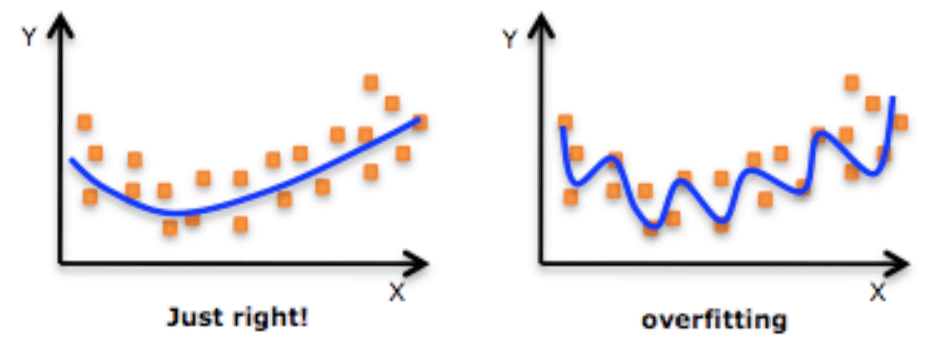

**Cross Validation**

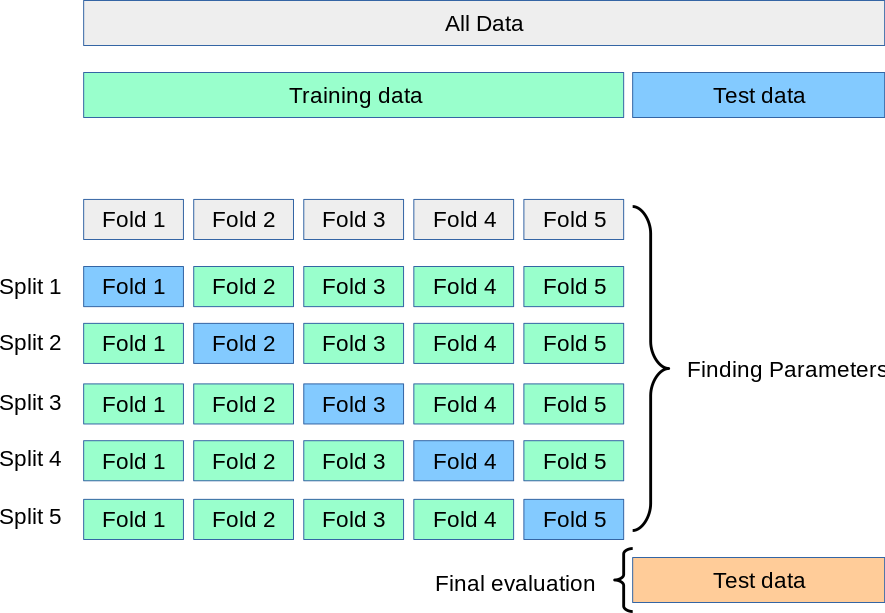

### Linear Regression using k-fold cross validation

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict 

# cross_val_score is the R2 val after perfroming cross validation.

In [21]:
cr = LinearRegression()
cv_score = cross_val_score(cr, X_train, y_train, cv = 5) # cv means Cross validation folds.
print ("The CV score for the model is:", cv_score)

The CV score for the model is: [0.92009437 0.90119987 0.90916145 0.92654738 0.92166077]


In [22]:
print ("CV_Score mean:", cv_score.mean())

CV_Score mean: 0.9157327701186171


In [23]:
# Taking the cross validation fold value as 4

cr = LinearRegression()
cv_score = cross_val_score(cr, X_train, y_train, cv = 4)
print ("The CV score for the model is:", cv_score)
print ("CV_Score mean:", cv_score.mean())

The CV score for the model is: [0.90318963 0.9030216  0.93983595 0.91827199]
CV_Score mean: 0.9160797935293802


In [24]:
# Taking the cross validation fold value as 3

cr = LinearRegression()
cv_score = cross_val_score(cr, X_train, y_train, cv = 3)
print ("The CV score for the model is:", cv_score)
print ("CV_Score mean:", cv_score.mean())

The CV score for the model is: [0.90904216 0.92013056 0.9255209 ]
CV_Score mean: 0.9182312082542176


In [25]:
# Taking the cross validation fold value as 2

cr = LinearRegression()
cv_score = cross_val_score(cr, X_train, y_train, cv = 2)
print ("The CV score for the model is:", cv_score)
print ("CV_Score mean:", cv_score.mean())

The CV score for the model is: [0.9080034  0.92991518]
CV_Score mean: 0.918959291258261


In [28]:
# Taking the cross validation fold value as 10

cr = LinearRegression()
cv_score = cross_val_score(cr, X_train, y_train, cv = 10)
print ("The CV score for the model is:", cv_score, '\n')
print ("CV_Score mean:", cv_score.mean())

The CV score for the model is: [0.89460976 0.93950986 0.80333388 0.94414693 0.8591572  0.92865633
 0.93605667 0.91725888 0.89502386 0.94632849] 

CV_Score mean: 0.9064081863045436


**k-fold validation**

Using k = 1, the usual method of training.
Using k = n, the training data is divided into n folds, where n = no of training data

**k = n, is called "Leave One Out Cross Validation"**

In [29]:
# k = 2 as the chosen value of CV

y_pred = cross_val_predict(cr, X_test, y_test, cv = 2)
y_pred

array([15.41213564, 14.43421929, 18.83663291, 24.58809707, 19.64939252,
       12.66055558, 14.10891314, 21.51645283, 19.03175088, 13.94935813,
       23.75354656,  7.05308143, 15.15526635, 18.51521267, 21.52889236,
       10.72978834, 16.67817887,  6.67784033, 18.97567926, 18.11642469,
       16.49538938,  7.95079283, 24.09971319, 14.28289837, 20.26314174,
        5.58382918,  9.39157918, 10.17453671, 23.0165678 ,  5.77972516,
       12.24877909, 21.47802842,  3.1479262 ,  3.04784189, 20.0771246 ,
       18.71972223,  6.30002591, 20.78636738,  8.21024853, 15.65779458])

**Cross Validation is a general tool which can be used on any ML technique**

### Regularization - Linear Regression

**Regularization is a method to resolve Overfitting with respect to any model. We make use of the following 3 methods pertaining to Linear Regression for resolving Overfitting:**

1. $ Lasso =  \sum (y - y') + \alpha * \sum |b_{i}| $, **y is the actual value, y' is the predicted value**. **(y - y') is the error**
2. $ Ridge = \sum (y - y')^{2} + \alpha * \sum |b_{i}|^{2}$
3. $ Elastic Net = \sum (y - y')^{2} + C_{1} * \sum |b_{i}| + C_{2} *\sum |b_{i}|^{2}$

### Lasso

In [37]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha = 0.1)
ls.fit(X_train, y_train)
r2_ls_train = r2_score(y_train, ls.predict(X_train))
r2_ls_test = r2_score(y_test, ls.predict(X_test))

print ('R2 Score: Lasso - Train:', r2_ls_train)
print ('R2 Score: Lasso - Test:', r2_ls_test)

mse_ls_train = mean_squared_error(y_train, ls.predict(X_train))
mse_ls_test = mean_squared_error(y_test, ls.predict(X_test))

print ('\n')
print ('MSE: Lasso - Train:', mse_ls_train)
print ('MSE: Lasso - Test:', mse_ls_test)

R2 Score: Lasso - Train: 0.9199573974585257
R2 Score: Lasso - Test: 0.8319851097741227


MSE: Lasso - Train: 1.8809530090965558
MSE: Lasso - Test: 6.838137776144052


In [49]:
# Changing the value of alpha

ls1 = Lasso(alpha = 0.5)
ls1.fit(X_train, y_train)
r2_ls1_train = r2_score(y_train, ls1.predict(X_train))
r2_ls1_test = r2_score(y_test, ls1.predict(X_test))

print ('R2 Score: Lasso - Train:', r2_ls1_train)
print ('R2 Score: Lasso - Test:', r2_ls1_test)

mse_ls1_train = mean_squared_error(y_train, ls1.predict(X_train))
mse_ls1_test = mean_squared_error(y_test, ls1.predict(X_test))

print ('\n')
print ('MSE: Lasso - Train:', mse_ls1_train)
print ('MSE: Lasso - Test:', mse_ls1_test)

R2 Score: Lasso - Train: 0.8992227796488054
R2 Score: Lasso - Test: 0.804363662639572


MSE: Lasso - Train: 2.3682040544564567
MSE: Lasso - Test: 7.962319453307366


### Ridge

In [38]:
from sklearn.linear_model import Ridge

rd = Ridge(alpha = 0.1)
rd.fit(X_train, y_train)
r2_rd_train = r2_score(y_train, rd.predict(X_train))
r2_rd_test = r2_score(y_test, rd.predict(X_test))

print ('R2 Score: Ridge - Train:', r2_rd_train)
print ('R2 Score: Ridge - Test:', r2_rd_test)

mse_rd_train = mean_squared_error(y_train, rd.predict(X_train))
mse_rd_test = mean_squared_error(y_test, rd.predict(X_test))

print ('\n')
print ('MSE: Ridge - Train:', mse_rd_train)
print ('MSE: Ridge - Test:', mse_rd_test)

R2 Score: Ridge - Train: 0.9209083458884119
R2 Score: Ridge - Test: 0.8352944314323737


MSE: Ridge - Train: 1.8586062930491445
MSE: Ridge - Test: 6.70344972906516


### Elastic Net

In [51]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha = 0.1)
en.fit(X_train, y_train)
r2_en_train = r2_score(y_train, en.predict(X_train))
r2_en_test = r2_score(y_test, en.predict(X_test))

print ('R2 Score: Elastic Net - Train:', r2_en_train)
print ('R2 Score: Elastic Net - Test:', r2_en_test)

mse_en_train = mean_squared_error(y_train, en.predict(X_train))
mse_en_test = mean_squared_error(y_test, en.predict(X_test))

print ('\n')
print ('MSE: Elastic Net - Train:', mse_en_train)
print ('MSE: Elastic Net - Test:', mse_en_test)

R2 Score: Elastic Net - Train: 0.9171475343844093
R2 Score: Elastic Net - Test: 0.8254019705243693


MSE: Elastic Net - Train: 1.9469831010300342
MSE: Elastic Net - Test: 7.106068869208696
